In [35]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("en.openfoodfacts.org.products.tsv", sep="\t")
df = df.sample(n=10000, random_state=1)
pd.set_option('display.max_rows', None)



/home/gio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
df.shape

(10000, 163)

<AxesSubplot:>

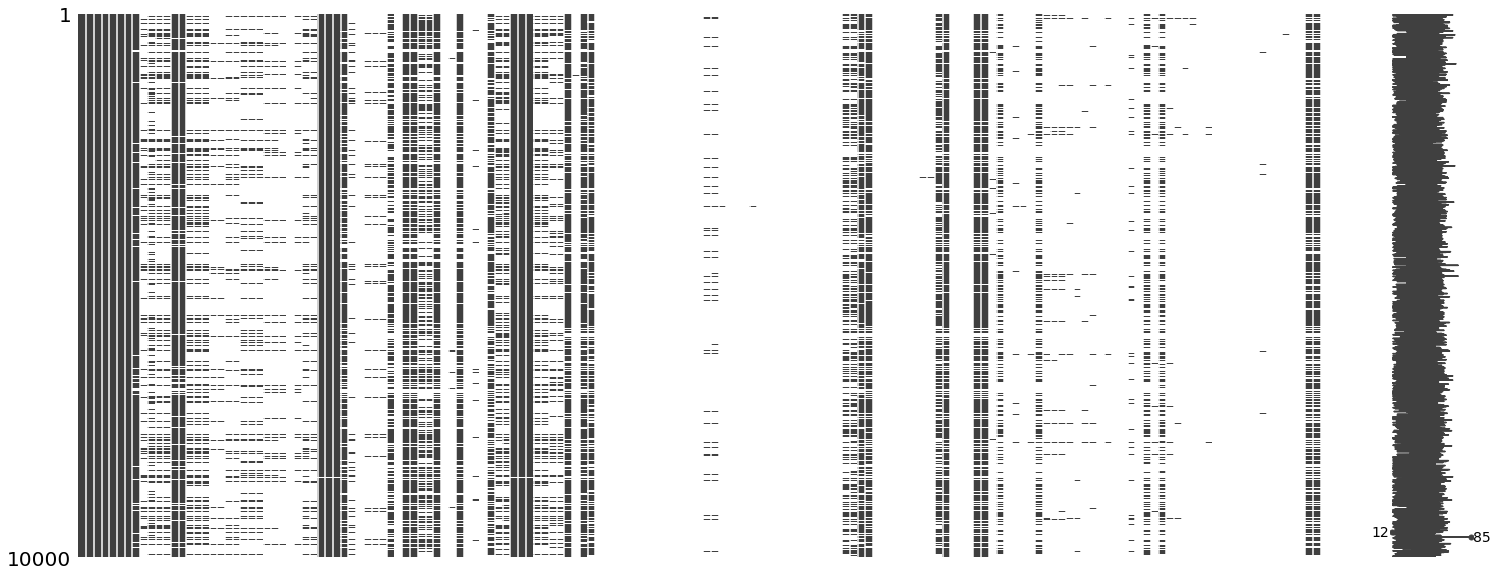

In [37]:
msno.matrix(df)

In [38]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
131669,710069118065,http://world-en.openfoodfacts.org/product/0710...,usda-ndb-import,1489077218,2017-03-09T16:33:38Z,1489077218,2017-03-09T16:33:38Z,"Nice Tea, Raspberry",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
129252,700381171633,http://world-en.openfoodfacts.org/product/0700...,usda-ndb-import,1489096009,2017-03-09T21:46:49Z,1489096010,2017-03-09T21:46:50Z,Premium Miso,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
85466,73562004007,http://world-en.openfoodfacts.org/product/0073...,usda-ndb-import,1489065613,2017-03-09T13:20:13Z,1489065613,2017-03-09T13:20:13Z,Oriental Stir Fry Seasoning Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN
242072,3350033203150,http://world-en.openfoodfacts.org/product/3350...,tchiroux,1428231826,2015-04-05T11:03:46Z,1492966058,2017-04-23T16:47:38Z,Feuilletés en escargot à la persillade,Biscuits feuilletés fourrés à la persillade,85 g,...,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.0,NaN,NaN
76726,71443031951,http://world-en.openfoodfacts.org/product/0071...,usda-ndb-import,1489071622,2017-03-09T15:00:22Z,1489071622,2017-03-09T15:00:22Z,"Quality Candies, Candy Cane Taffy",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN


In [15]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [6]:
list(df.countries.unique())

['US',
 'France',
 'Italia',
 'Slovenia',
 'en:FR',
 'en:CH',
 'Union européenne',
 'España',
 'en:TN',
 'Suisse',
 'en:CZ',
 'Germany,Spain',
 'New Zealand',
 'Deutschland',
 'Россия',
 'Argentina',
 'en:BE',
 'en:CA',
 'Australia',
 'en:GP',
 'United Kingdom',
 'Belgique,France',
 'Sverige',
 'United States',
 'en:FR,France',
 'Switzerland',
 'Royaume-Uni,France, en:denmark, Suisse',
 'Österreich',
 'en:KR',
 'en:SK',
 'Poland,Polska',
 'Belgium',
 'Serbia',
 'France,Allemagne,Suisse',
 'Croatia,Serbia,Slovenia',
 'Guadeloupe',
 'Belgique',
 'France,Suède',
 'en:JP',
 'France,Espagne',
 'en:ES',
 'Canada',
 'Francia,España',
 'en:YT',
 'Poland,United Kingdom',
 'en:AT',
 'France,Allemagne',
 'en:GB',
 'Chile',
 'Germany',
 'Portugal',
 'France,United States',
 'Italy',
 'en:BR',
 'France, Suisse',
 'en:AU',
 'Nederland',
 'France,Allemagne,Royaume-Uni',
 'Brasil',
 '日本',
 'en:RE',
 'Suisse, en:france',
 'Brazil',
 'Belgique,France,Suisse',
 'Hungary',
 'Algérie',
 'en:US',
 'en:DE',


In [7]:
list(df.nutrition_grade_fr.unique())

['b', 'd', 'e', nan, 'c', 'a']

In [19]:
df['nutrition-score-fr_100g'].head()

131669     2.0
129252    14.0
85466     16.0
242072    26.0
76726     18.0
Name: nutrition-score-fr_100g, dtype: float64

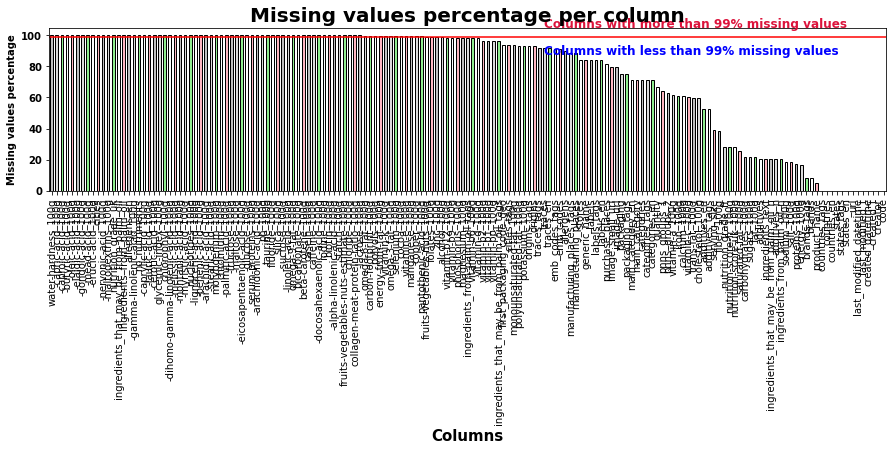

In [45]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv1(df,99, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))
